Data Loading and Cleaning:

Load the dataset using Pandas.
Perform basic data cleaning (handling missing values, incorrect data types, etc.).

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotnine import ggplot,aes, geom_histogram,geom_point,geom_boxplot,geom_bar,geom_line,geom_smooth

palmer_penguins_dataset = pd.read_csv('Palmer Penguins Dataset.csv')

palmer_penguins_dataset.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB


In [17]:
palmer_penguins_dataset.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,342.000000,342.000000,342.000000,342.000000,344.000000
mean,43.921930,17.151170,200.915205,4201.754386,2008.029070
std,5.459584,1.974793,14.061714,801.954536,0.818356
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.225000,15.600000,190.000000,3550.000000,2007.000000
50%,44.450000,17.300000,197.000000,4050.000000,2008.000000
75%,48.500000,18.700000,213.000000,4750.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


We find that there are missing values for some rows. Therefore we will erase rows that have more than 2 columns as NaN.
In addition in order to get the best approach to calculate the genders for the penguins, we will group the dataset by island and sex

In [18]:
palmer_penguins_dataset_copy = palmer_penguins_dataset.dropna(thresh=2).copy
palmer_penguins_dataset_copy = palmer_penguins_dataset[palmer_penguins_dataset.isnull().sum(axis=1) <= 2]

In [19]:
grouped = palmer_penguins_dataset_copy.groupby(['island', 'sex'])['body_mass_g'].mean().reset_index()
grouped

,island,sex,body_mass_g
0,Biscoe,female,4319.375000
1,Biscoe,male,5104.518072
2,Dream,female,3446.311475
3,Dream,male,3987.096774
4,Torgersen,female,3395.833333
5,Torgersen,male,4034.782609


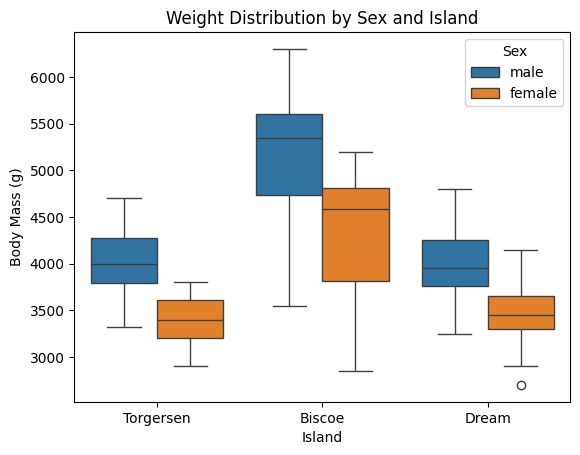

In [20]:
sns.boxplot(x='island', y='body_mass_g', hue='sex', data=palmer_penguins_dataset_copy)
plt.title('Weight Distribution by Sex and Island')
plt.xlabel('Island')
plt.ylabel('Body Mass (g)')
plt.legend(title='Sex')
plt.show()

We will be assigning value >=4500 to males and <4500 to females

In [21]:
# Fill 'sex' for island Biscoe based on body_mass_g
palmer_penguins_dataset_copy.loc[(palmer_penguins_dataset_copy['island'] == 'Biscoe') & (palmer_penguins_dataset_copy['body_mass_g'] >= 4500) & (palmer_penguins_dataset_copy['sex'].isna()), 'sex'] = 'male'
palmer_penguins_dataset_copy.loc[(palmer_penguins_dataset_copy['island'] == 'Biscoe') & (palmer_penguins_dataset_copy['body_mass_g'] < 4500) & (palmer_penguins_dataset_copy['sex'].isna()), 'sex'] = 'female'

# Fill 'sex' for island Dream based on body_mass_g
palmer_penguins_dataset_copy.loc[(palmer_penguins_dataset_copy['island'] == 'Dream') & (palmer_penguins_dataset_copy['body_mass_g'] >= 3500) & (palmer_penguins_dataset_copy['sex'].isna()), 'sex'] = 'male'
palmer_penguins_dataset_copy.loc[(palmer_penguins_dataset_copy['island'] == 'Dream') & (palmer_penguins_dataset_copy['body_mass_g'] < 3500) & (palmer_penguins_dataset_copy['sex'].isna()), 'sex'] = 'female'

# Fill 'sex' for island Torgersen based on body_mass_g
palmer_penguins_dataset_copy.loc[(palmer_penguins_dataset_copy['island'] == 'Torgersen') & (palmer_penguins_dataset_copy['body_mass_g'] >= 3500) & (palmer_penguins_dataset_copy['sex'].isna()), 'sex'] = 'male'
palmer_penguins_dataset_copy.loc[(palmer_penguins_dataset_copy['island'] == 'Torgersen') & (palmer_penguins_dataset_copy['body_mass_g'] < 3500) & (palmer_penguins_dataset_copy['sex'].isna()), 'sex'] = 'female'


In [22]:
palmer_penguins_dataset_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 342 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            342 non-null    object 
 1   island             342 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                342 non-null    object 
 7   year               342 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 24.0+ KB


In [23]:
palmer_penguins_dataset_copy.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,342.000000,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386,2008.029240
std,5.459584,1.974793,14.061714,801.954536,0.817168
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.225000,15.600000,190.000000,3550.000000,2007.000000
50%,44.450000,17.300000,197.000000,4050.000000,2008.000000
75%,48.500000,18.700000,213.000000,4750.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


Now that the data is cleaned and missing values (male,female) were assigned, we will proceed to show the distribution of the data.

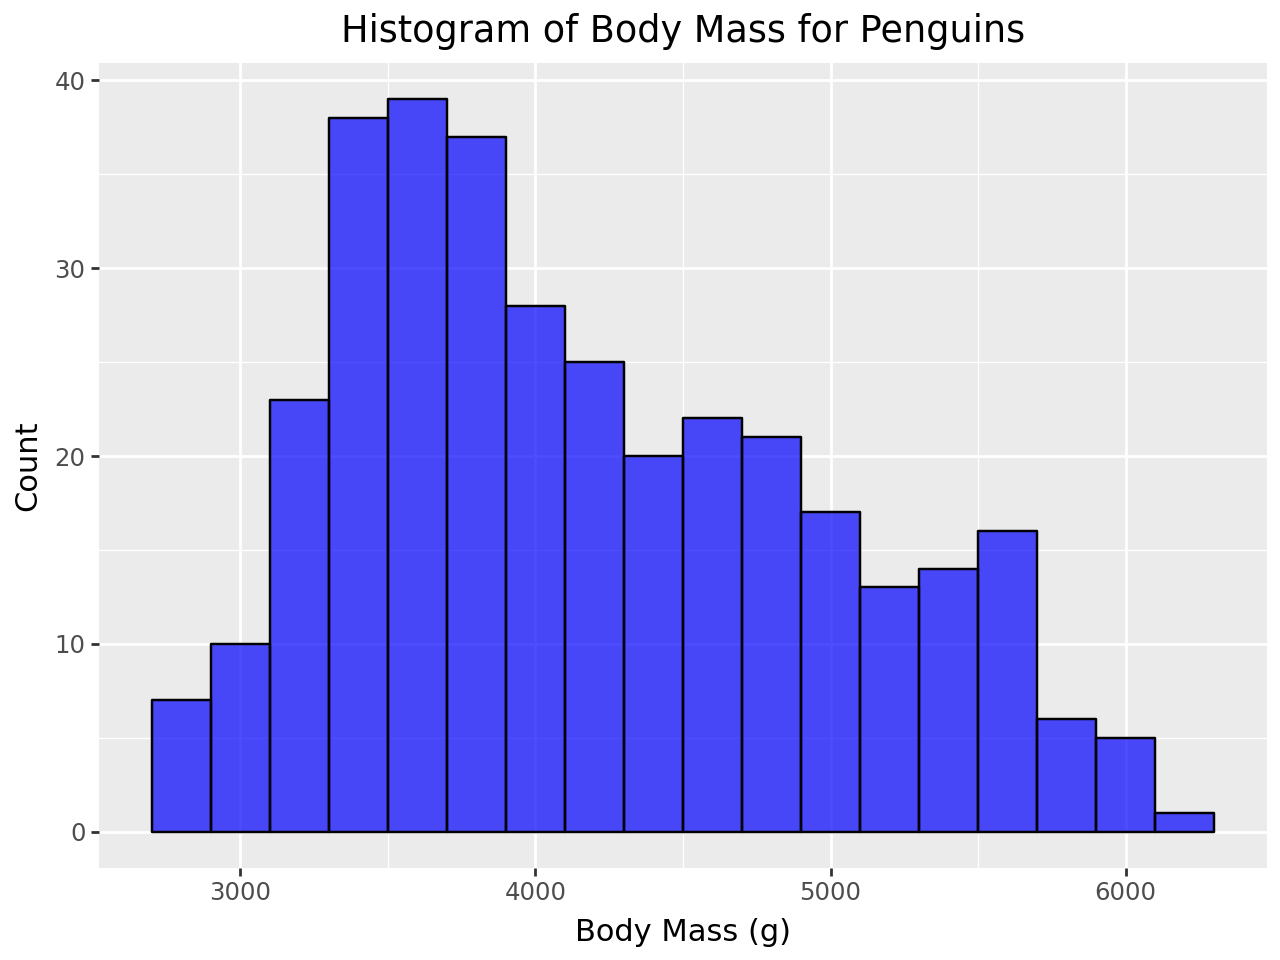

In [24]:
from plotnine import ggplot, aes, geom_point, labs, geom_histogram

histogram = (
    ggplot(palmer_penguins_dataset_copy, aes(x='body_mass_g')) +
    geom_histogram(binwidth=200, fill='blue', color='black', alpha=0.7) +
    labs(
        title='Histogram of Body Mass for Penguins',
        x='Body Mass (g)',
        y='Count'
    ) 
)
histogram

Ths above histogram shows that the frequencies' distributions are skewed to the right. To show the new distribution for male female, we will have to split the dataset again.

In [25]:
palmer_penguins_dataset_copy_m = palmer_penguins_dataset_copy[palmer_penguins_dataset['sex'] == 'male']
palmer_penguins_dataset_copy_f = palmer_penguins_dataset_copy[palmer_penguins_dataset['sex'] == 'female']

C:\Users\User\AppData\Local\Temp\ipykernel_51216\4019211293.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\User\AppData\Local\Temp\ipykernel_51216\4019211293.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


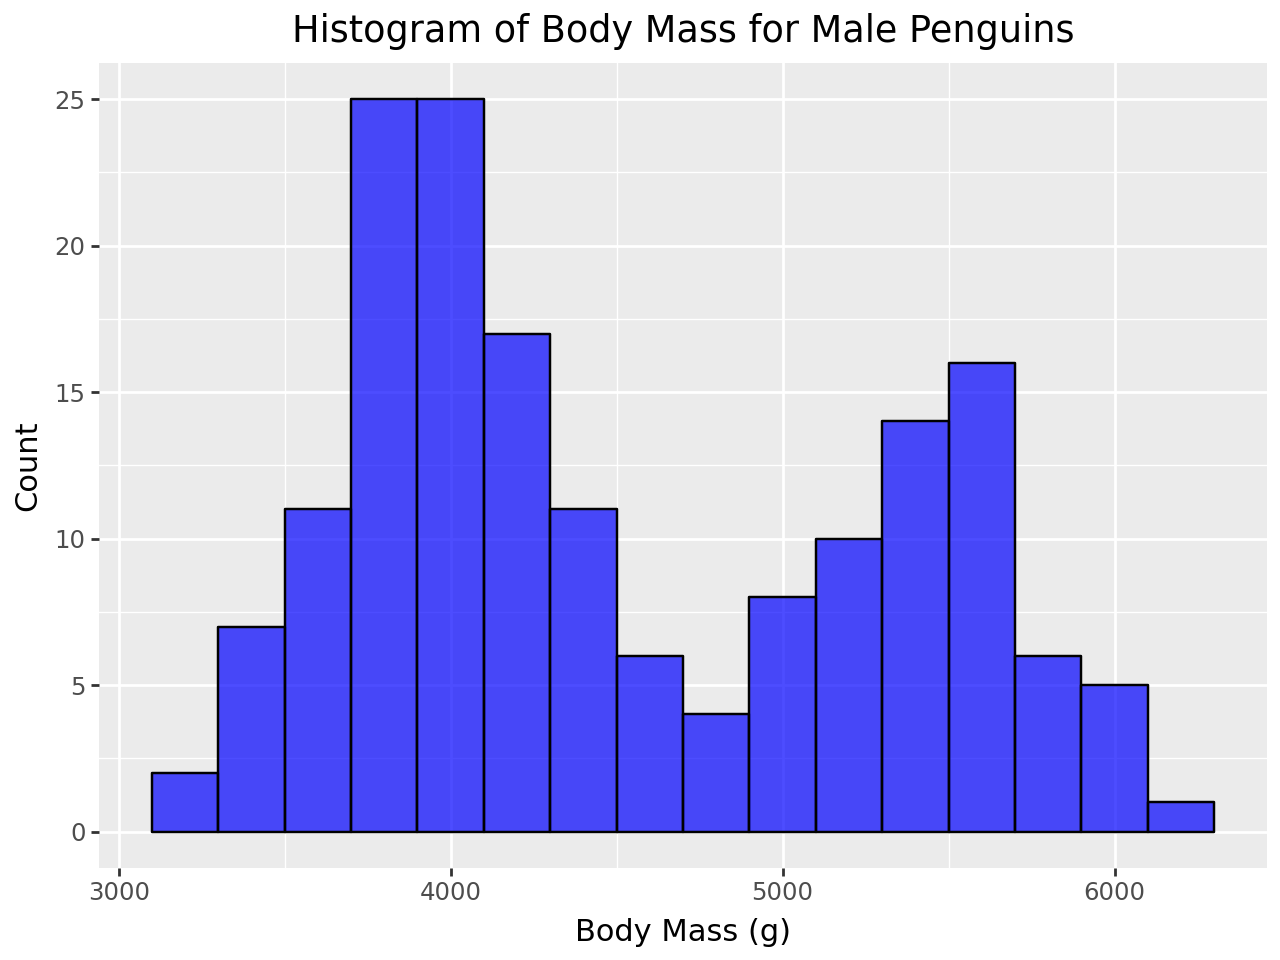

In [26]:
histogram_male = (
    ggplot(palmer_penguins_dataset_copy_m, aes(x='body_mass_g')) +
    geom_histogram(binwidth=200, fill='blue', color='black', alpha=0.7) +
    labs(
        title='Histogram of Body Mass for Male Penguins',
        x='Body Mass (g)',
        y='Count'
    ) 
)
histogram_male

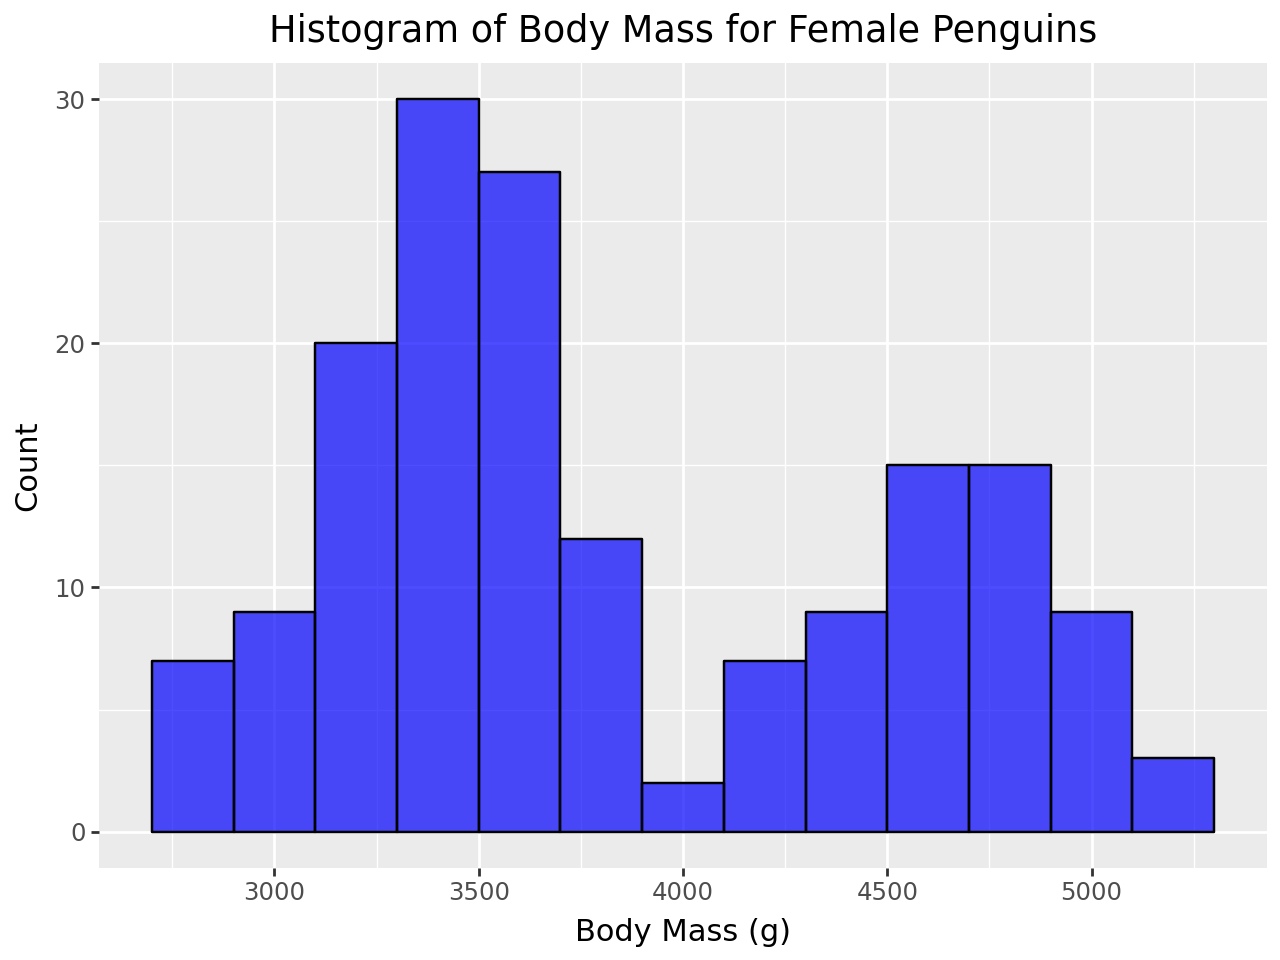

In [27]:
histogram_female = (
    ggplot(palmer_penguins_dataset_copy_f, aes(x='body_mass_g')) +
    geom_histogram(binwidth=200, fill='blue', color='black', alpha=0.7) +
    labs(
        title='Histogram of Body Mass for Female Penguins',
        x='Body Mass (g)',
        y='Count'
    ) 
)
histogram_female

Species Distribution: Use a bar chart to show the distribution of penguin species.

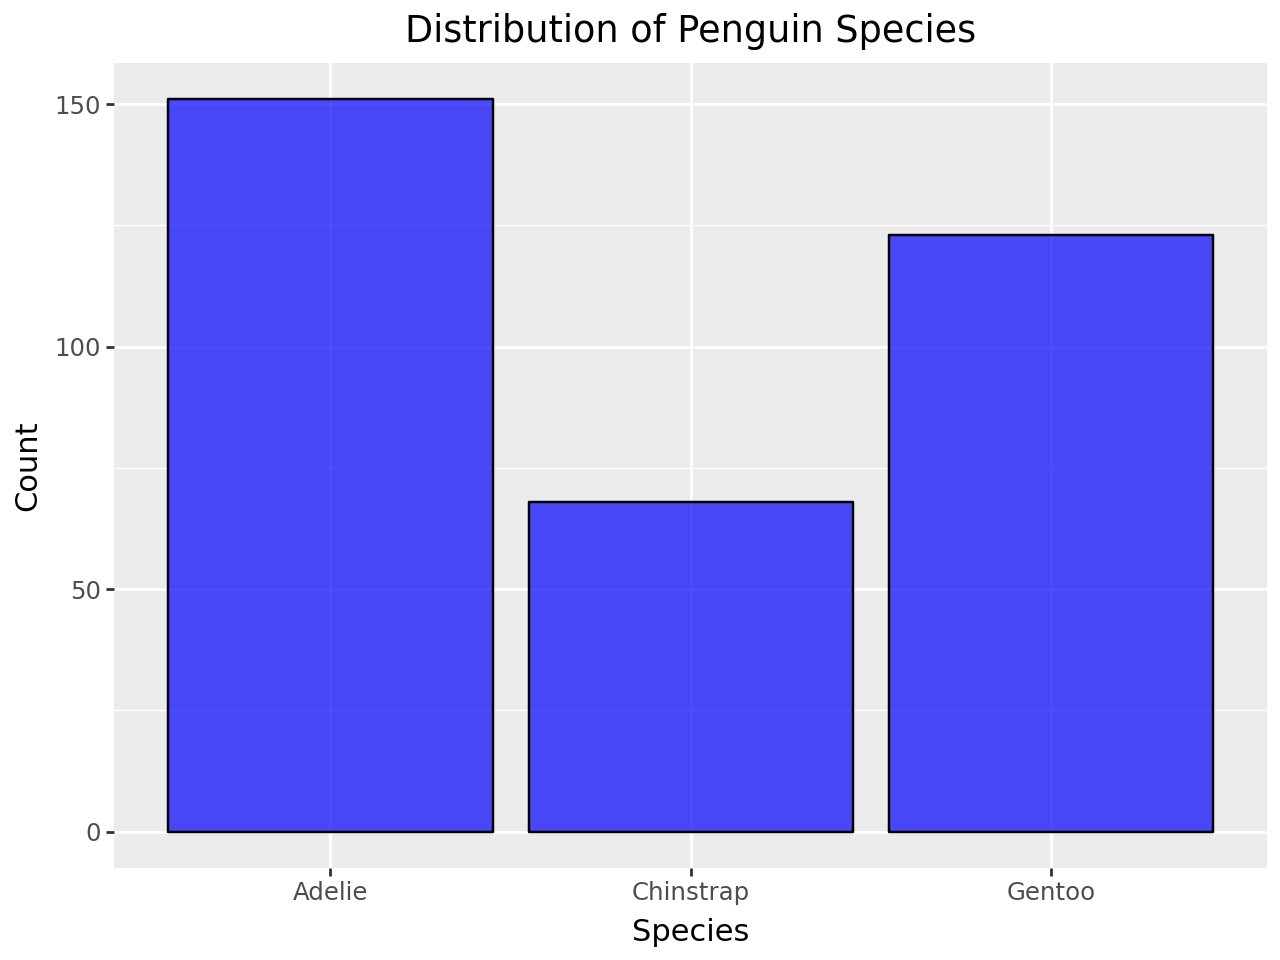

In [28]:
from plotnine import ggplot, aes, geom_bar, labs

species_distribution = (
    ggplot(palmer_penguins_dataset_copy, aes(x='species')) +
    geom_bar(fill='blue', color='black', alpha=0.7) +
    labs(
        title='Distribution of Penguin Species',
        x='Species',
        y='Count'
    )
)
species_distribution

Flipper Length vs. Body Mass: Create a scatter plot to analyze the relationship between flipper length and body mass, color-coded by species.


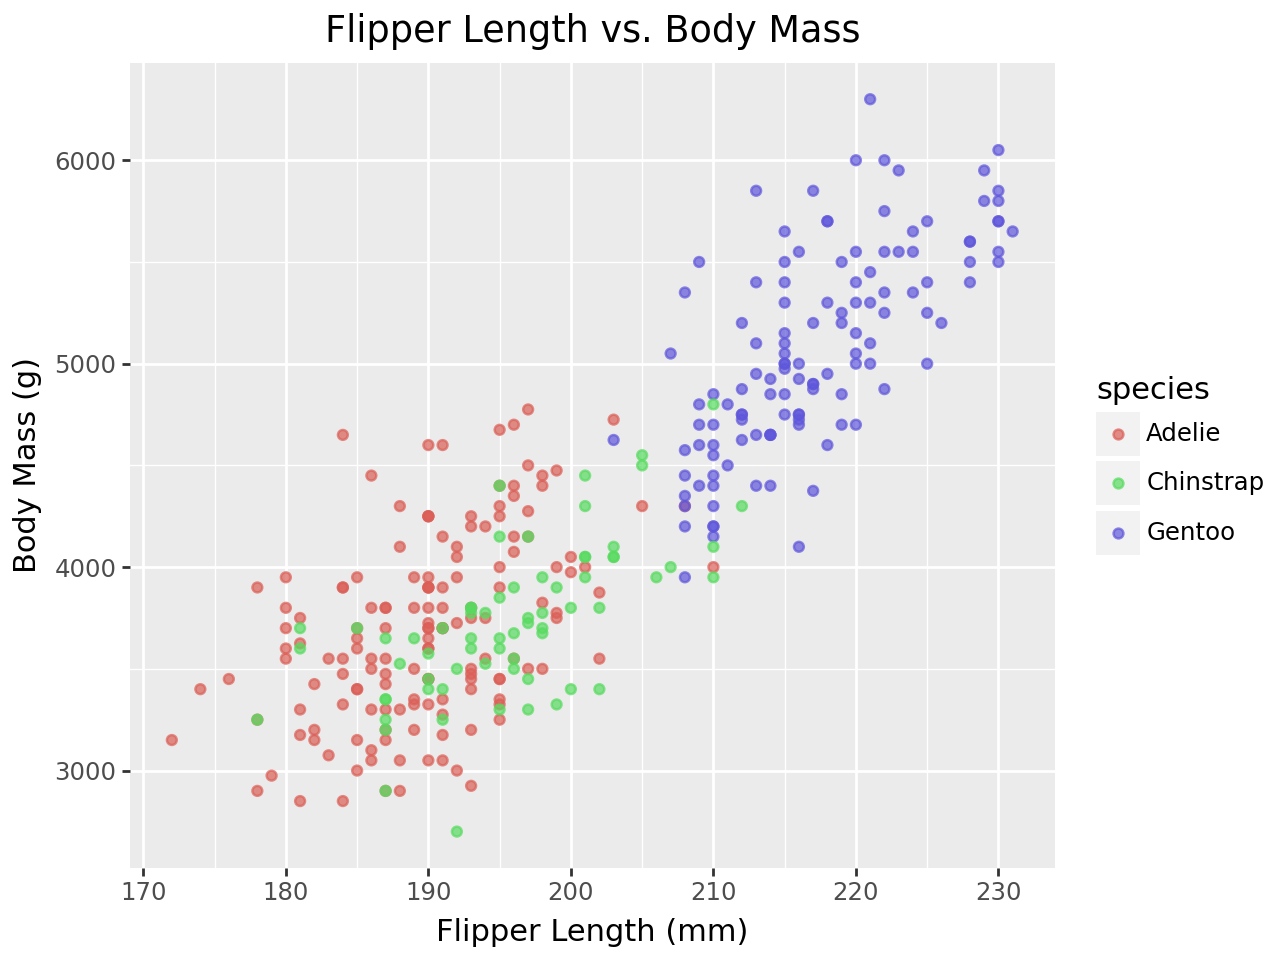

In [29]:
from plotnine import ggplot, aes, geom_point

scatter_plot = (
    ggplot(palmer_penguins_dataset_copy, aes(x='flipper_length_mm', y='body_mass_g', color='species')) +
    geom_point(alpha=0.7) +
    labs(
        title='Flipper Length vs. Body Mass',
        x='Flipper Length (mm)',
        y='Body Mass (g)'
    )
)
scatter_plot

Island Distribution: Visualize the count of penguins on each island using a pie chart.


In [30]:
island_distribution_pie = px.pie(palmer_penguins_dataset_copy, names='island', title='Island Distribution of Penguins')
island_distribution_pie


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'domain': {'x': [0.0, 1.0], 'y': [0.0, 1.0]},
              'hovertemplate': 'island=%{label}<extra></extra>',
              'labels': array(['Torgersen', 'Torgersen', 'Torgersen', ..., 'Dream', 'Dream', 'Dream'],
                              dtype=object),
              'legendgroup': '',
              'name': '',
              'showlegend': True,
              'type': 'pie'}],
    'layout': {'legend': {'tracegroupgap': 0}, 'template': '...', 'title': {'text': 'Island Distribution of Penguins'}}
})

Sex Distribution within Species: Create grouped bar charts showing the distribution of sex within each penguin species.


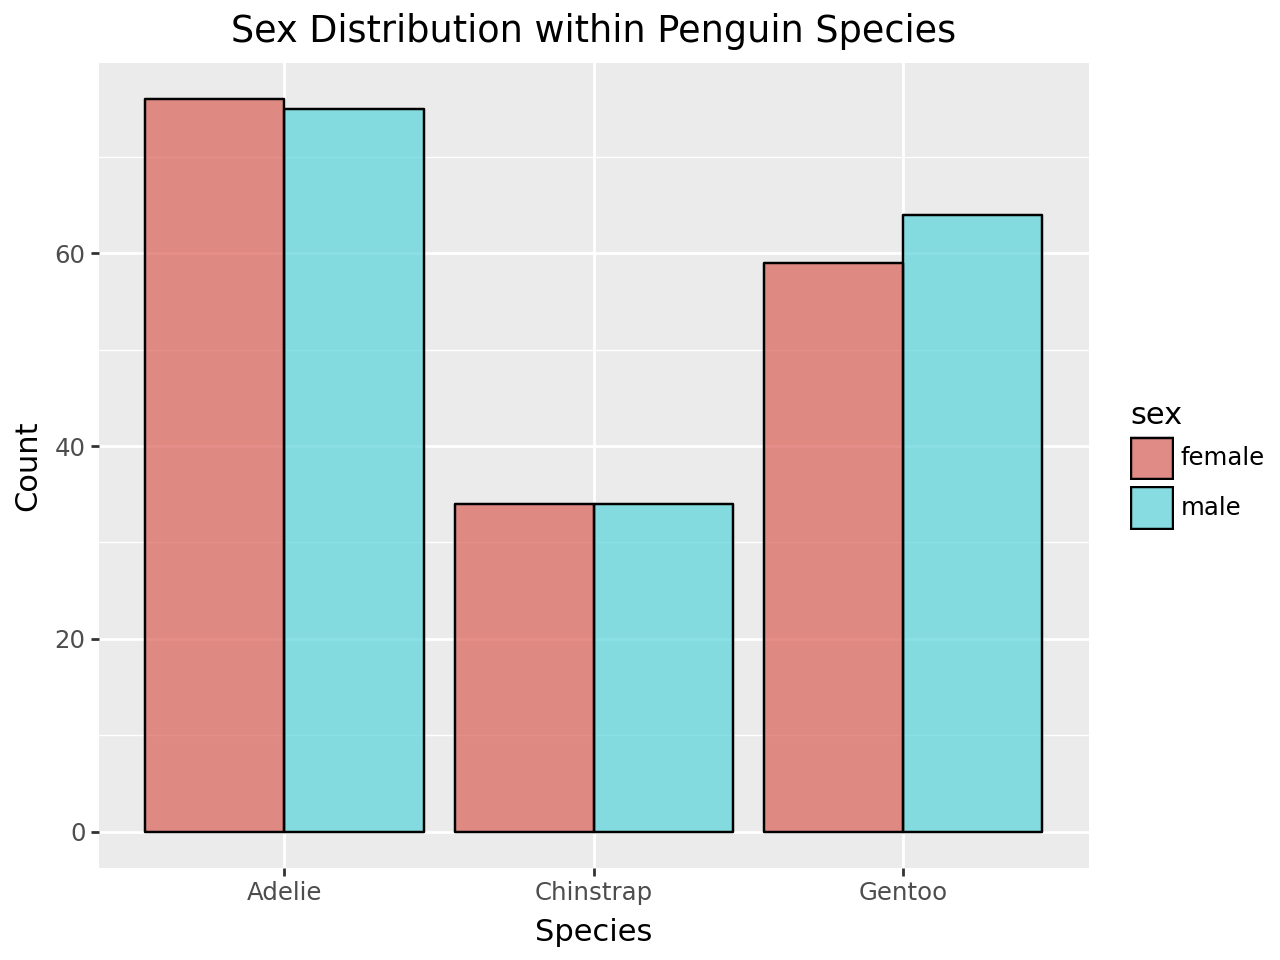

In [31]:
sex_distribution = (
    ggplot(palmer_penguins_dataset_copy, aes(x='species', fill='sex')) +
    geom_bar(position='dodge', color='black', alpha=0.7) +
    labs(
        title='Sex Distribution within Penguin Species',
        x='Species',
        y='Count'
    )
)
sex_distribution

Heatmap of Correlations: Plot a heatmap to visualize the correlations between numerical variables.


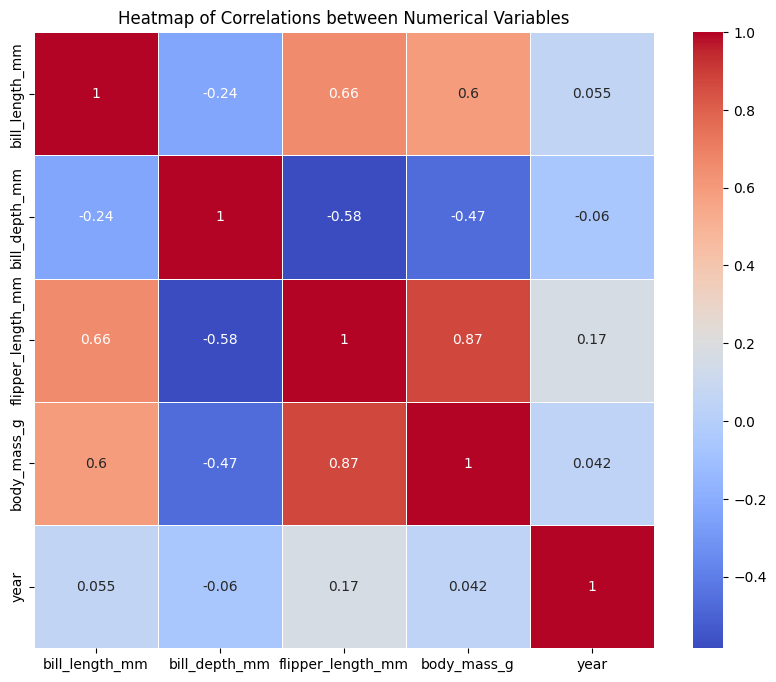

In [32]:
import seaborn as sns
correlation_matrix = palmer_penguins_dataset_copy.select_dtypes(include=['float64', 'int64']).corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Correlations between Numerical Variables')
plt.show()

Boxplots for Measurements: Generate boxplots for flipper length, body mass, and bill measurements, segmented by species.


Boxplots for Flipper Length

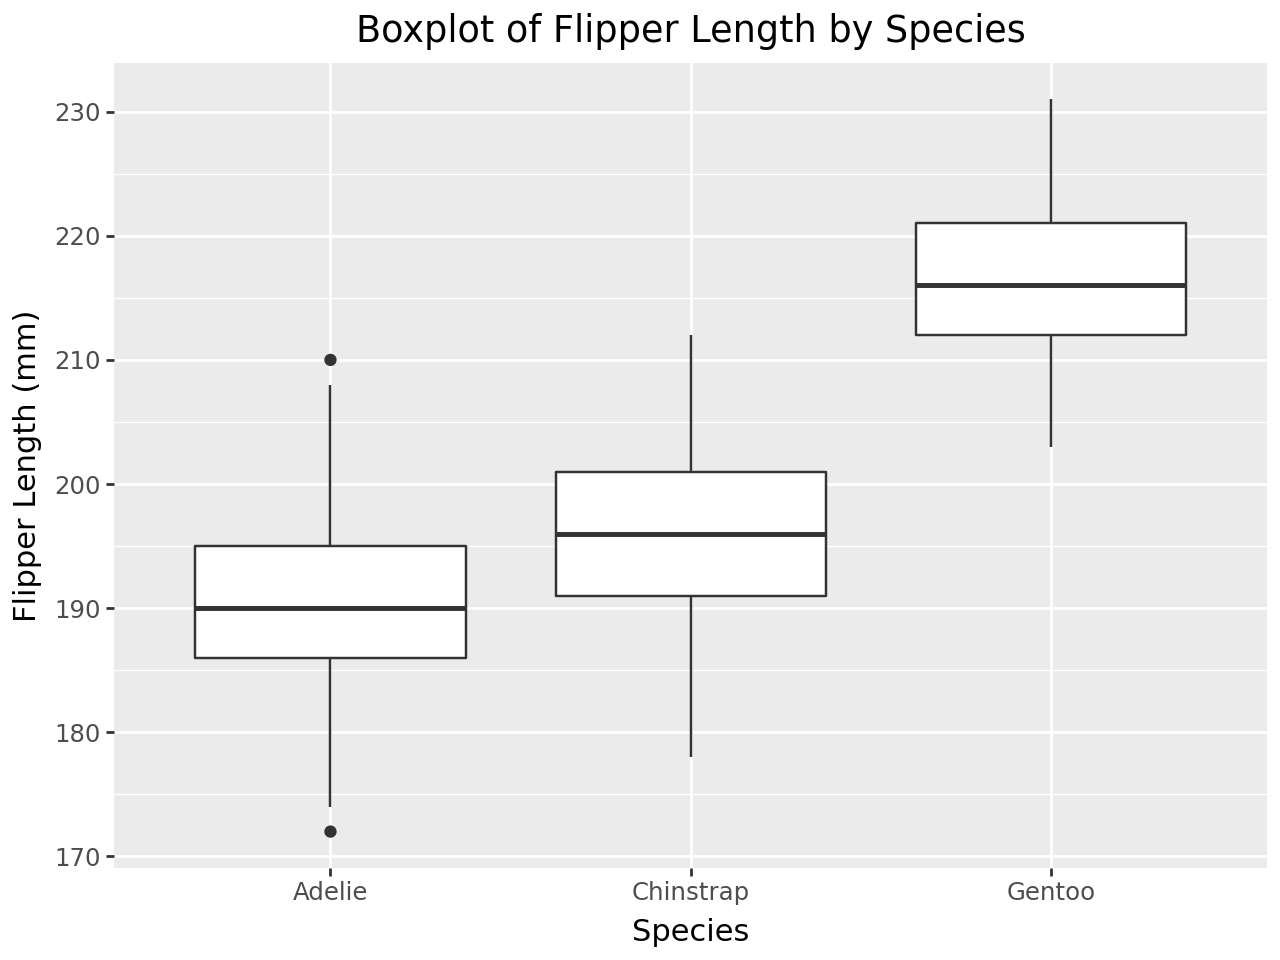

In [33]:
from plotnine import ggplot, aes, geom_boxplot, labs

# Boxplot for flipper length
boxplot_flipper_length = (
    ggplot(palmer_penguins_dataset_copy, aes(x='species', y='flipper_length_mm')) +
    geom_boxplot() +
    labs(
        title='Boxplot of Flipper Length by Species',
        x='Species',
        y='Flipper Length (mm)'
    )
)
boxplot_flipper_length


Boxplot for Body Mass

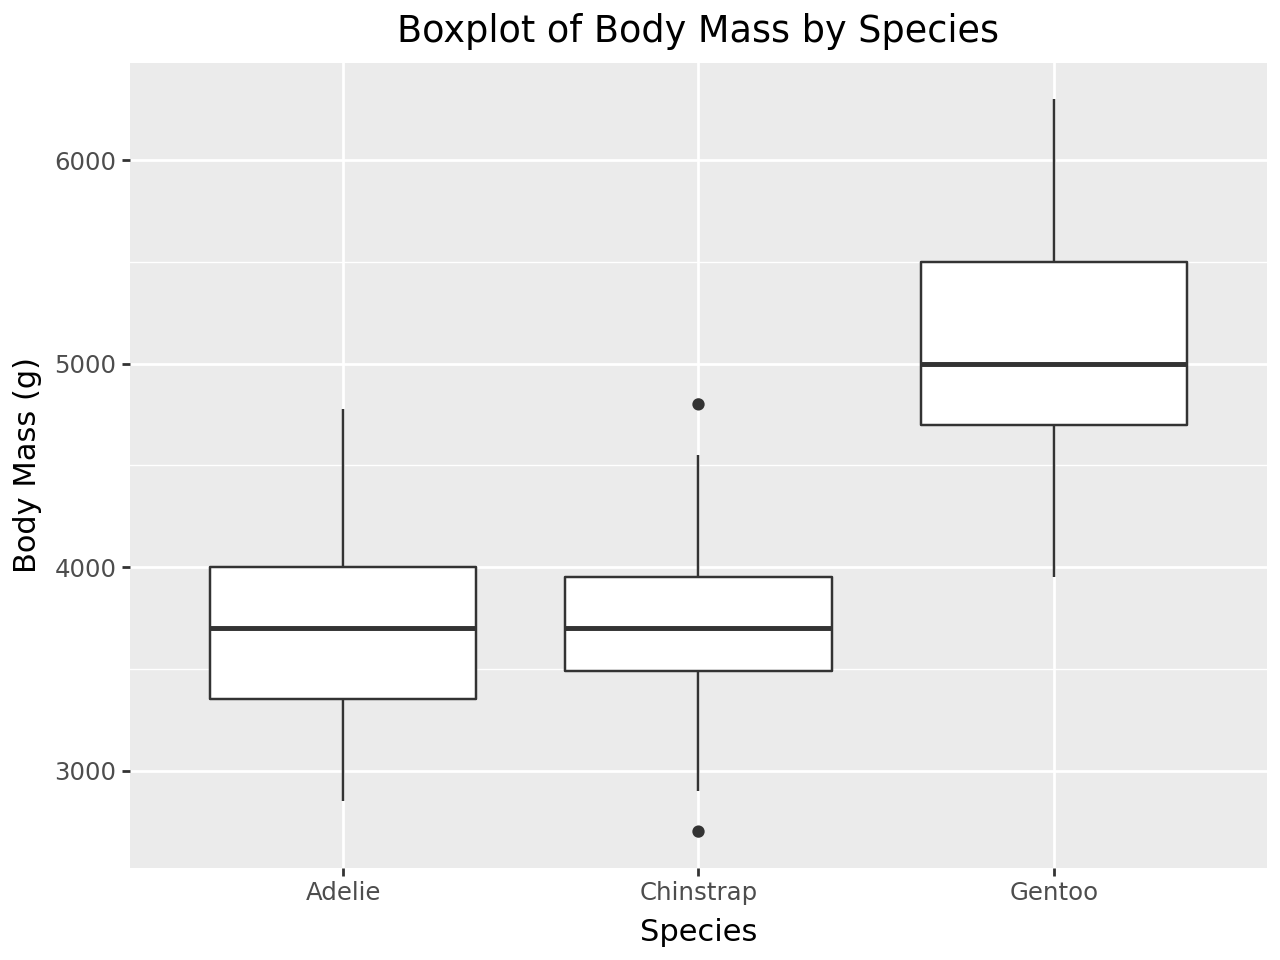

In [34]:
# Boxplot for body mass
boxplot_body_mass = (
    ggplot(palmer_penguins_dataset_copy, aes(x='species', y='body_mass_g')) +
    geom_boxplot() +
    labs(
        title='Boxplot of Body Mass by Species',
        x='Species',
        y='Body Mass (g)'
    )
)
boxplot_body_mass

Boxplot for Bill Measurements

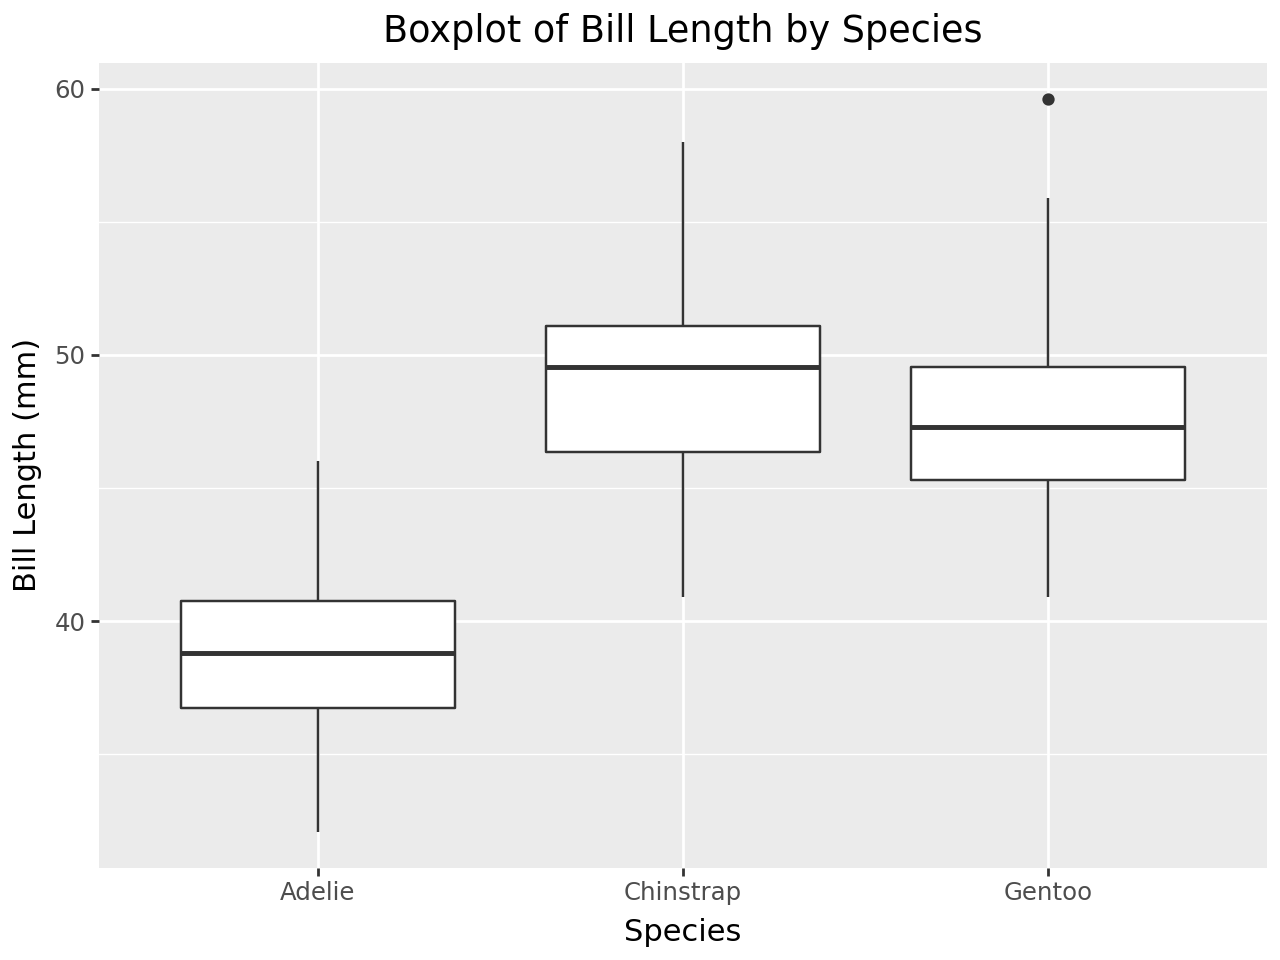

In [35]:
# Boxplot for bill length
boxplot_bill_length = (
    ggplot(palmer_penguins_dataset_copy, aes(x='species', y='bill_length_mm')) +
    geom_boxplot() +
    labs(
        title='Boxplot of Bill Length by Species',
        x='Species',
        y='Bill Length (mm)'
    )
)
boxplot_bill_length

Histograms of Measurements: Create histograms to show the distribution of key measurements (bill length, bill depth, flipper length).


Distribution of Bill Length

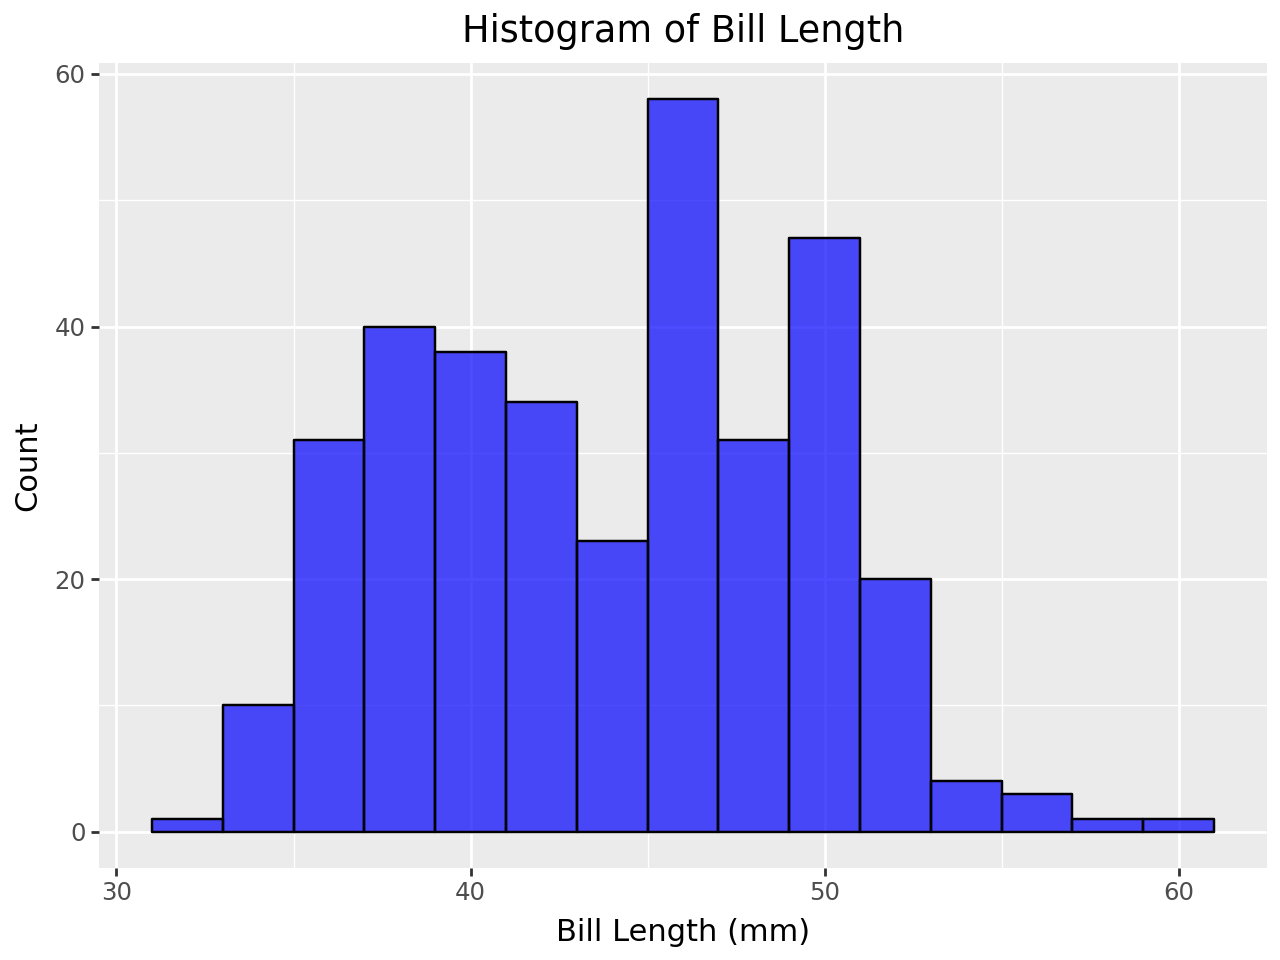

In [36]:
histogram_bill_length = (
    ggplot(palmer_penguins_dataset_copy, aes(x='bill_length_mm')) +
    geom_histogram(binwidth=2, fill='blue', color='black', alpha=0.7) +
    labs(
        title='Histogram of Bill Length',
        x='Bill Length (mm)',
        y='Count'
    )
)
histogram_bill_length



Distribution of Bill Depth

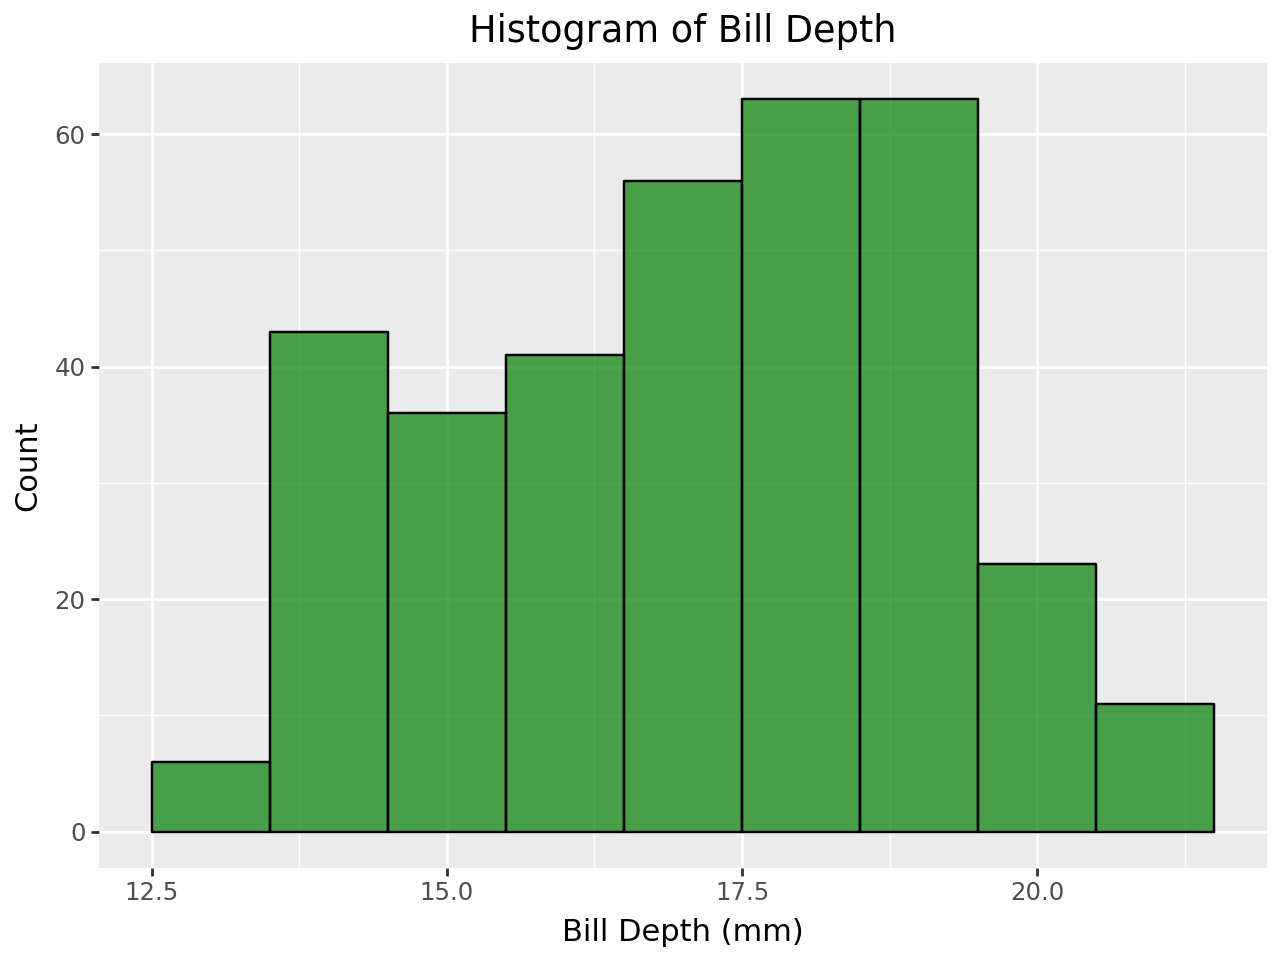

In [37]:

histogram_bill_depth = (
    ggplot(palmer_penguins_dataset_copy, aes(x='bill_depth_mm')) +
    geom_histogram(binwidth=1, fill='green', color='black', alpha=0.7) +
    labs(
        title='Histogram of Bill Depth',
        x='Bill Depth (mm)',
        y='Count'
    )
)
histogram_bill_depth



Distribution of Flipper Length

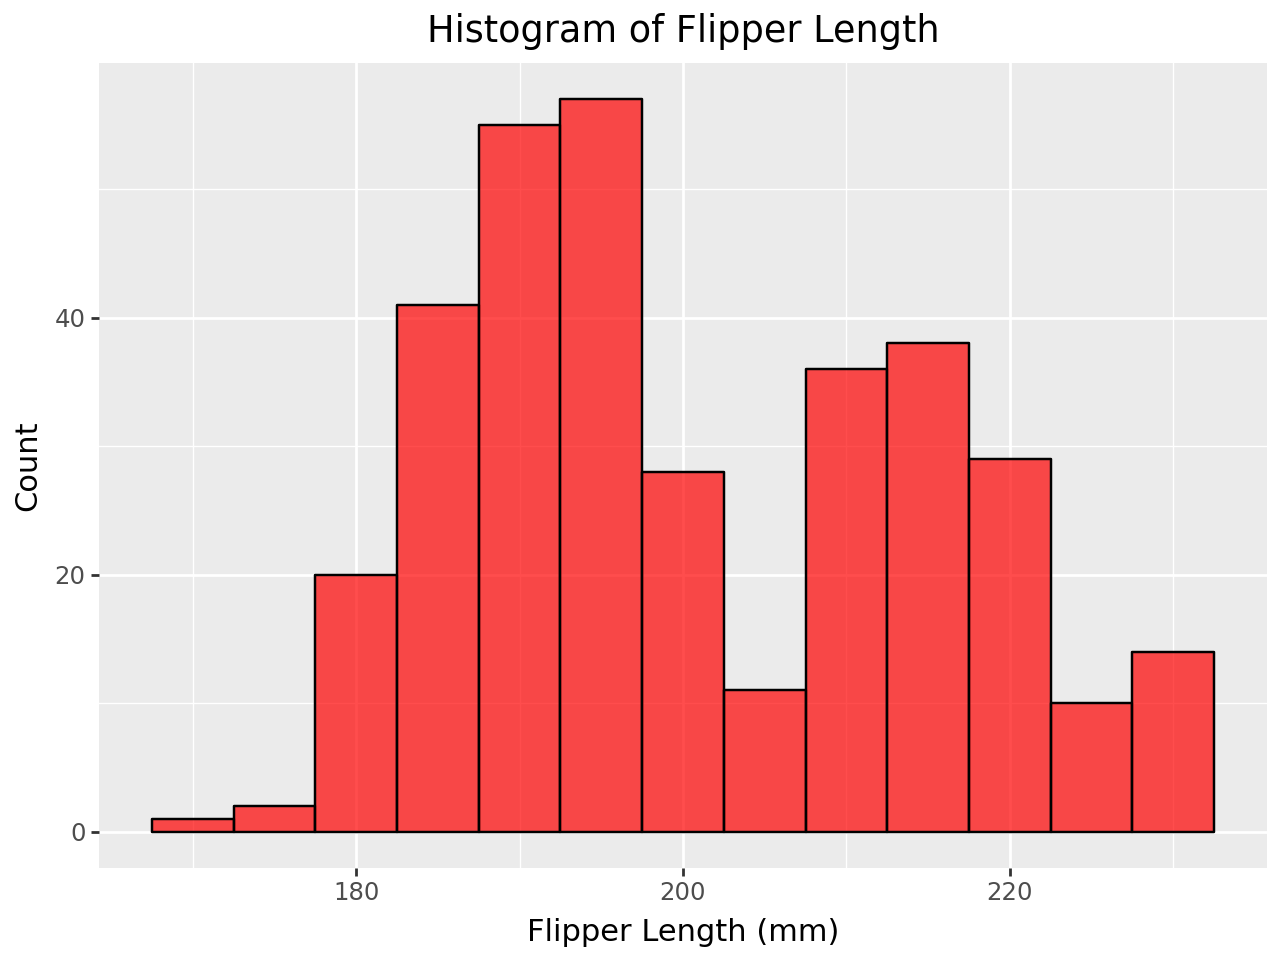

In [38]:
histogram_flipper_length = (
    ggplot(palmer_penguins_dataset_copy, aes(x='flipper_length_mm')) +
    geom_histogram(binwidth=5, fill='red', color='black', alpha=0.7) +
    labs(
        title='Histogram of Flipper Length',
        x='Flipper Length (mm)',
        y='Count'
    )
)
histogram_flipper_length

Use Seaborn’s pairplot to visualize pairwise relationships in the dataset.


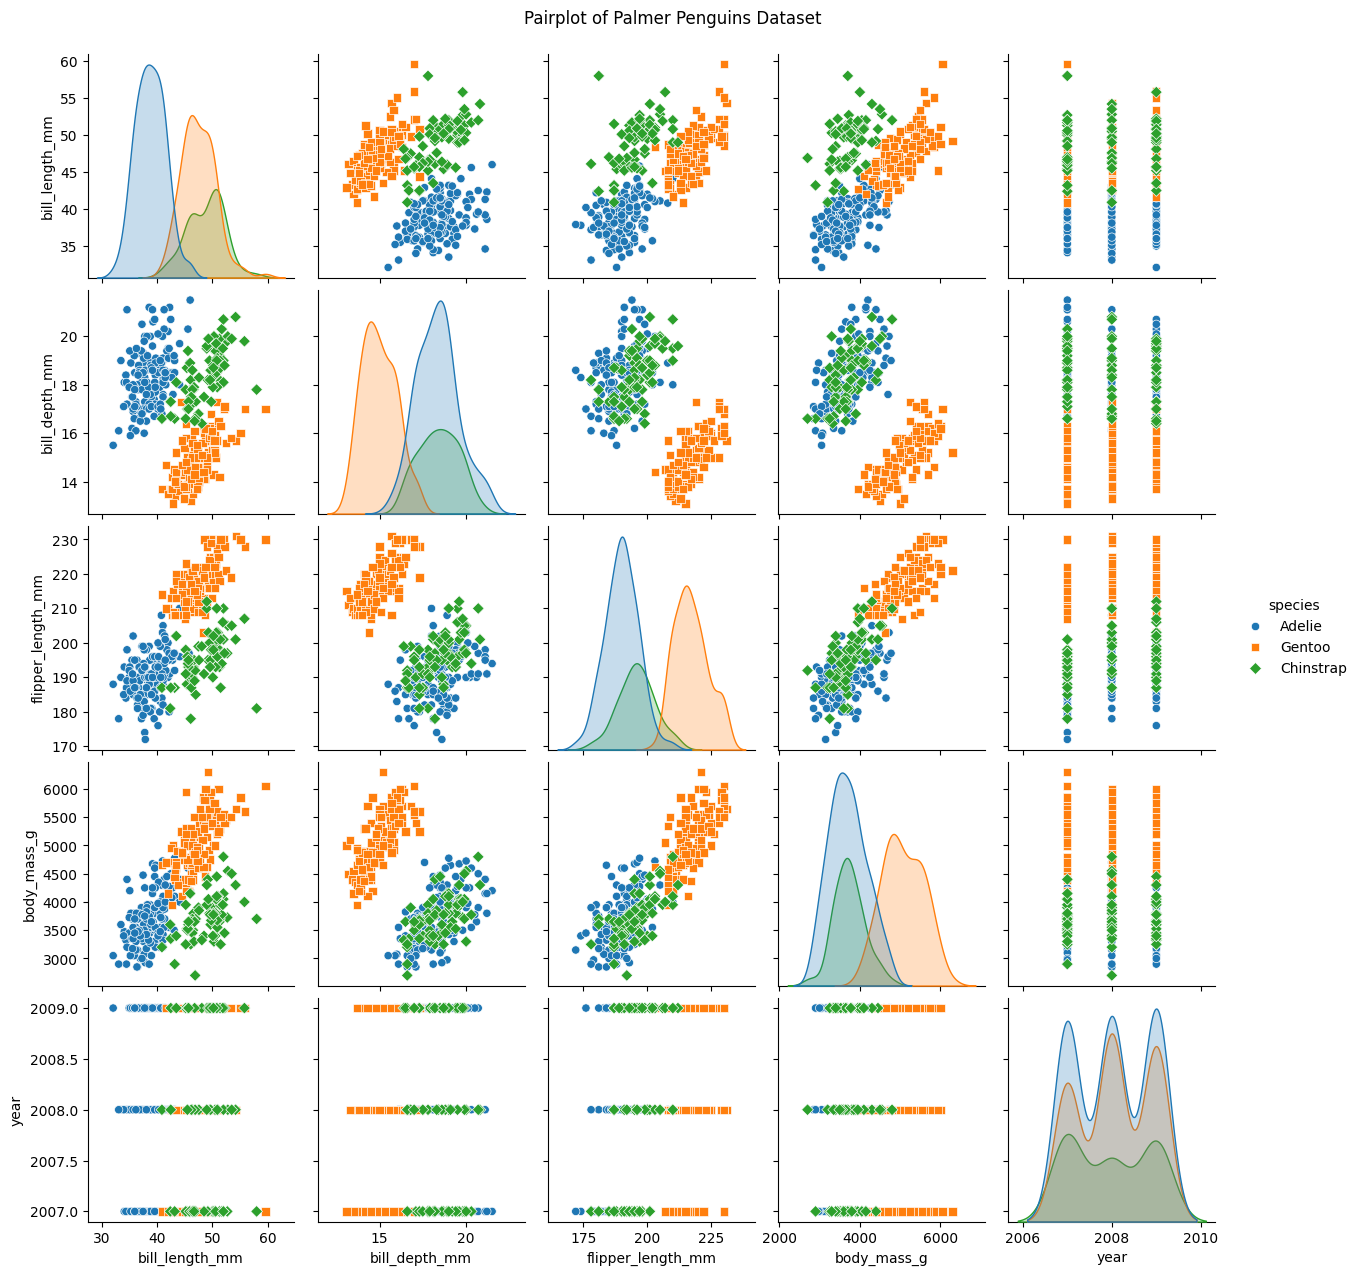

In [39]:
sns.pairplot(palmer_penguins_dataset_copy, hue='species', markers=["o", "s", "D"])
plt.suptitle('Pairplot of Palmer Penguins Dataset', y=1.02)
plt.show()